In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from pandas import DataFrame, Series
import seaborn as sns
pd.options.display.max_columns = 99

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
team_data = pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\Team.csv")

In [4]:
team_data.head()

,Team Code,Name,Conference Code
0,5,Akron,875
1,8,Alabama,911
2,9,UAB,24312
3,28,Arizona State,905
4,29,Arizona,905


In [5]:
Conference = pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\Conference.csv")

In [6]:
team_data = pd.merge(team_data, Conference, on = 'Conference Code')

In [7]:
team_data.head(1)

,Team Code,Name_x,Conference Code,Name_y,Subdivision
0,5,Akron,875,Mid-American Conference,FBS


In [8]:
team_data.rename(columns = {'Name_x':'Team Name','Name_y':'Conference Name'},inplace = True)

In [9]:
team_data.head(1)

,Team Code,Team Name,Conference Code,Conference Name,Subdivision
0,5,Akron,875,Mid-American Conference,FBS


In [18]:
team_data.groupby('Conference Name')['Team Name'].count().sort_values(ascending = False)[:15]

Conference Name
Atlantic Coast Conference       14
Southeastern Conference         14
Conference USA                  14
Mid-American Conference         13
Big Sky                         13
Big Ten Conference              12
Pac-12 Conference               12
Mountain West Conference        12
Mid-Eastern                     11
MVFC                            10
Big 12 Conference               10
Colonial                        10
American Athletic Conference    10
Southwestern                    10
Pioneer                         10
Name: Team Name, dtype: int64

In [21]:
team_data['Conference Name'].nunique()

25

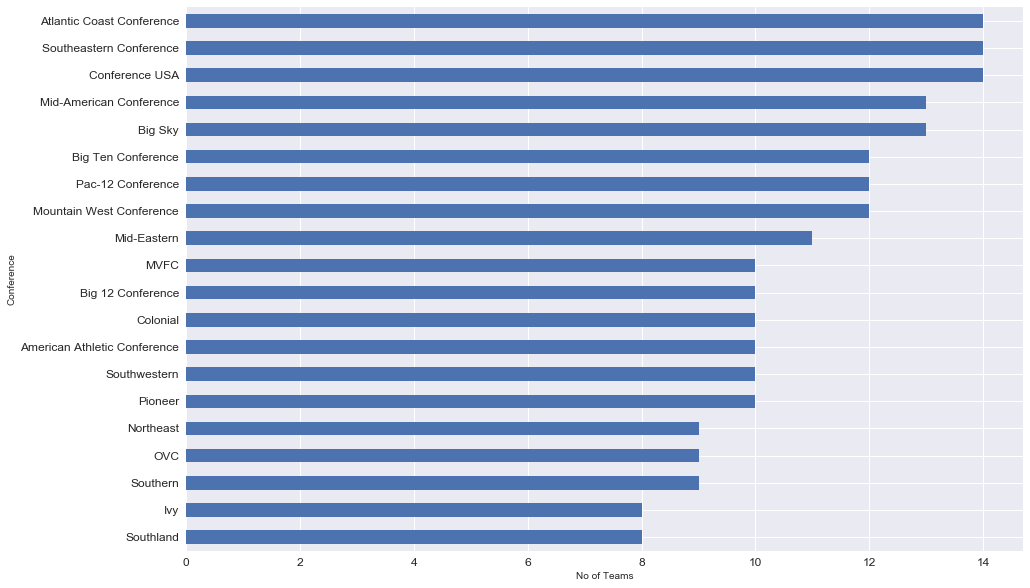

In [22]:
ax = plt.figure(figsize = (15,10))
ax = team_data.groupby('Conference Name')['Team Name'].count().sort_values(ascending = False)[:20].plot(kind = 'barh')
plt.xlabel('No of Teams')
plt.ylabel('Conference')
ax.invert_yaxis()

In [23]:
print("Total College Teams in USA are : " ,team_data.shape[0])

('Total College Teams in USA are : ', 247)


In [24]:
player_data = pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\Player.csv")

In [25]:
player_data.head()

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS
1,1022862,5,Alexander,Broderick,2,SR,FB,72.0,225.0,Covington,GA,US,Eastside HS
2,1046129,5,Allen,Christian,49,FR,FB,72.0,249.0,Morgantown,WV,US,Morgantown HS
3,1035204,5,Allen,Jeff,46,JR,DL,74.0,262.0,Morgantown,WV,US,Coastal Carolina/Morgantown HS
4,1030820,5,Bailey,Austin,40,SR,DL,71.0,262.0,West Friendship,MD,US,DeMatha Catholic HS


In [26]:
player_data.shape

(21794, 13)

In [27]:
data = pd.merge(player_data, team_data, on='Team Code')

In [28]:
data.shape

(21794, 17)

In [29]:
data.head()

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS
1,1022862,5,Alexander,Broderick,2,SR,FB,72.0,225.0,Covington,GA,US,Eastside HS,Akron,875,Mid-American Conference,FBS
2,1046129,5,Allen,Christian,49,FR,FB,72.0,249.0,Morgantown,WV,US,Morgantown HS,Akron,875,Mid-American Conference,FBS
3,1035204,5,Allen,Jeff,46,JR,DL,74.0,262.0,Morgantown,WV,US,Coastal Carolina/Morgantown HS,Akron,875,Mid-American Conference,FBS
4,1030820,5,Bailey,Austin,40,SR,DL,71.0,262.0,West Friendship,MD,US,DeMatha Catholic HS,Akron,875,Mid-American Conference,FBS


In [30]:
abc  = data[(data['Conference Code'] == 875) & (data['Position'].isin(['QB','WR','DT','RB','TE']))].groupby(['Team Name','Position'])['Player Code'].count().unstack()

In [31]:
abc

Position,DT,QB,RB,TE,WR
Team Name,,,,,
Akron,NaN,5.0,6.0,4.0,19.0
Ball State,6.0,4.0,4.0,6.0,15.0
Bowling Green,2.0,6.0,8.0,6.0,13.0
Buffalo,NaN,5.0,10.0,7.0,13.0
Central Michigan,1.0,4.0,7.0,7.0,12.0
Eastern Michigan,NaN,5.0,8.0,3.0,12.0
Kent State,3.0,6.0,9.0,8.0,13.0
Massachusetts,NaN,5.0,8.0,4.0,16.0
Miami (Ohio),NaN,5.0,9.0,6.0,12.0


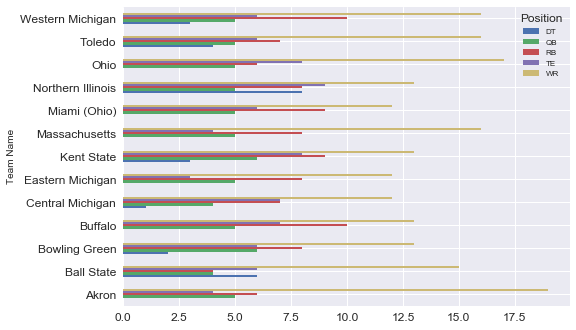

In [32]:
ax1 = plt.figure(figsize = (20,10))
ax1 = abc.plot(kind = 'barh')

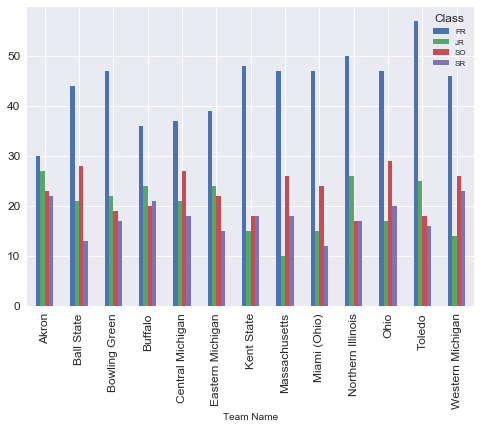

In [61]:
plt.figure(figsize = (20,8))
ax = data[(data['Conference Code'] == 875)].groupby(['Team Name','Class'])['Player Code'].count().unstack().plot(kind = 'bar')


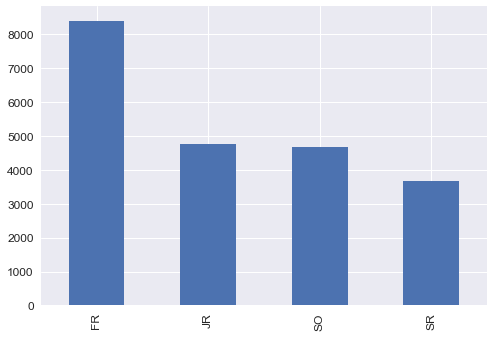

In [36]:
data.Class.value_counts().plot(kind = 'bar')

In [37]:
data['Home Country'].value_counts()[:5]

US    13546
CA       46
AS       20
AU       19
DE        8
Name: Home Country, dtype: int64

In [39]:
data.head()

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS
1,1022862,5,Alexander,Broderick,2,SR,FB,72.0,225.0,Covington,GA,US,Eastside HS,Akron,875,Mid-American Conference,FBS
2,1046129,5,Allen,Christian,49,FR,FB,72.0,249.0,Morgantown,WV,US,Morgantown HS,Akron,875,Mid-American Conference,FBS
3,1035204,5,Allen,Jeff,46,JR,DL,74.0,262.0,Morgantown,WV,US,Coastal Carolina/Morgantown HS,Akron,875,Mid-American Conference,FBS
4,1030820,5,Bailey,Austin,40,SR,DL,71.0,262.0,West Friendship,MD,US,DeMatha Catholic HS,Akron,875,Mid-American Conference,FBS


In [46]:
sorted(data['Position'].unique())

[nan,
 'ATH',
 'C',
 'CB',
 'DB',
 'DE',
 'DL',
 'DS',
 'DT',
 'FB',
 'FL',
 'FS',
 'HB',
 'HOLD',
 'ILB',
 'K',
 'LB',
 'LS',
 'MLB',
 'NG',
 'NT',
 'OG',
 'OL',
 'OLB',
 'OT',
 'P',
 'PK',
 'QB',
 'RB',
 'ROV',
 'S',
 'SB',
 'SE',
 'SN',
 'SS',
 'TB',
 'TE',
 'WR']

In [48]:
positionmap = {
 'C':'Center','CB':'Cornerback',
 'DB':'Defensive Back',
 'DE':'Defensive End',
 'DL':'Defensive Lineman',
 'DS':'Defensive specialists',
 'DT':'Defensive Tackle',
 'FB':'Fullback',
 'FL':'Flanker',
 'FS':'Free Safety',
 'HB':'halfback',
 'ILB':'Inside Linebacker',
 'K':'Kicker',
 'LB':'Linebacker',
 'LS':'long snapper',
 'MLB':'Middle Linebacker',
 'NG':'Nose Guard',
 'NT':'Nose Tackle',
 'OG':'Offensive Guard',
 'OL':'Offensive Lineman',
 'OLB':'Outside Linebacker',
 'OT':'offensive tackle',
 'P':'Punter',
 'PK':'Placekicker',
 'QB':'Quarterback',
 'RB':'Running Back',
 'ROV':'Rover',
 'S':'Safety',
 'SB':'Slotback',
 'SE':'Split End',
 'SN':'Snapper',
 'SS':'Strong Safety',
 'TB':'Tailback',
 'TE':'Tight End',
 'WR':'Wide Receiver'}

In [52]:
data['Position Name'] = data['Position'].map(positionmap)

In [53]:
data.head()

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision,Position Name
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,Cornerback
1,1022862,5,Alexander,Broderick,2,SR,FB,72.0,225.0,Covington,GA,US,Eastside HS,Akron,875,Mid-American Conference,FBS,Fullback
2,1046129,5,Allen,Christian,49,FR,FB,72.0,249.0,Morgantown,WV,US,Morgantown HS,Akron,875,Mid-American Conference,FBS,Fullback
3,1035204,5,Allen,Jeff,46,JR,DL,74.0,262.0,Morgantown,WV,US,Coastal Carolina/Morgantown HS,Akron,875,Mid-American Conference,FBS,Defensive Lineman
4,1030820,5,Bailey,Austin,40,SR,DL,71.0,262.0,West Friendship,MD,US,DeMatha Catholic HS,Akron,875,Mid-American Conference,FBS,Defensive Lineman


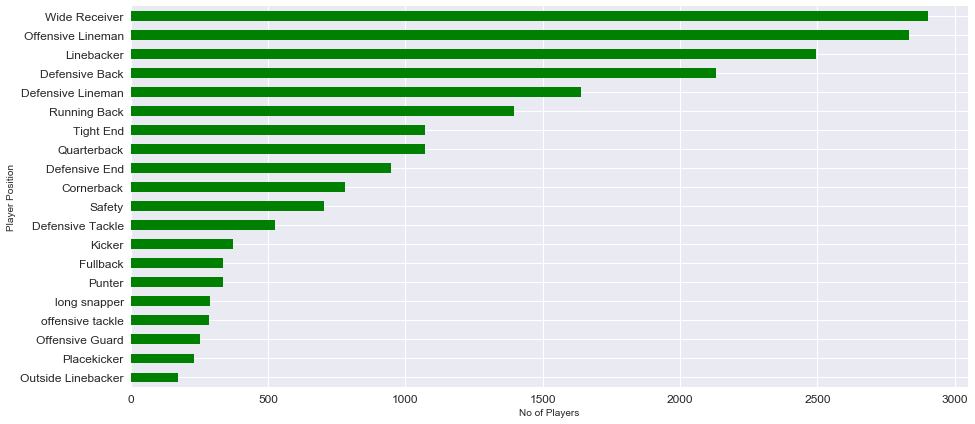

In [57]:
plt.figure(figsize = (15,7))
ax = data['Position Name'].value_counts()[:20].plot(kind = 'barh', color = 'g')
plt.xlabel('No of Players')
plt.ylabel('Player Position')

ax.invert_yaxis()


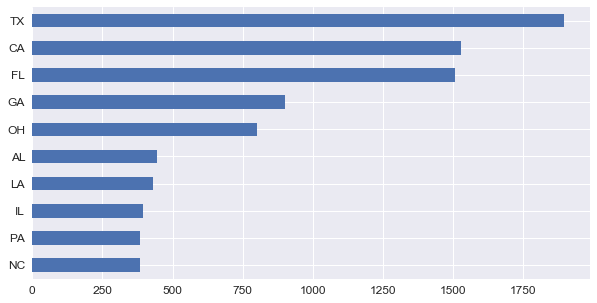

In [60]:
plt.figure(figsize = (10,5))
ax = data['Home State'].value_counts()[:10].plot(kind = 'barh')
ax.invert_yaxis()

In [62]:
data.head(1)

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision,Position Name
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,Cornerback


In [60]:
data.columns

Index([u'Player Code', u'Team Code', u'Last Name', u'First Name',
       u'Uniform Number', u'Class', u'Position', u'Height', u'Weight',
       u'Home Town', u'Home State', u'Home Country', u'Last School',
       u'Team Name', u'Conference Code', u'Conference Name', u'Subdivision'],
      dtype='object')

In [62]:
data.head(1)

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS


In [64]:
team_play = pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\Team-game-statistics.csv")

In [65]:
team_play.head()

,Team Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Kickoff Ret,Kickoff Ret Yard,Kickoff Ret TD,Punt Ret,Punt Ret Yard,Punt Ret TD,Fum Ret,Fum Ret Yard,Fum Ret TD,Int Ret,Int Ret Yard,Int Ret TD,Misc Ret,Misc Ret Yard,Misc Ret TD,Field Goal Att,Field Goal Made,Off XP Kick Att,Off XP Kick Made,Off 2XP Att,Off 2XP Made,Def 2XP Att,Def 2XP Made,Safety,Points,Punt,Punt Yard,Kickoff,Kickoff Yard,Kickoff Touchback,Kickoff Out-Of-Bounds,Kickoff Onside,Fumble,Fumble Lost,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked,1st Down Rush,1st Down Pass,1st Down Penalty,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,5012820130829,35,134,0,25,18,116,1,1,0,4,78,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7,7,327,2,110,0,0,0,2,1,32,40,8.0,28,4.0,22,4,1,2,0,7,8,0,1641,6,49,16,8,0,0,1,1,0
1,5,317000520130907,25,69,1,32,20,287,4,1,0,2,39,0,2,28,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0,0,0,0,0,35,5,229,6,367,1,0,0,0,0,60,46,9.0,42,2.0,20,0,1,4,0,2,11,1,1300,7,70,13,8,0,0,3,3,0
2,5,5041820130914,30,107,0,49,25,311,2,2,0,3,61,0,2,9,0,0,0,0,3,53,1,0,0,0,3,1,3,3,0,0,0,0,0,24,5,222,5,263,1,0,0,0,0,40,10,8.0,31,1.0,10,5,1,1,0,6,14,1,1996,5,38,18,9,1,0,3,1,0
3,5,671000520130921,27,134,1,43,27,321,3,2,0,5,101,0,1,1,0,0,0,0,1,0,0,0,0,0,3,1,3,3,1,0,0,0,0,30,5,205,6,313,1,0,0,0,0,56,24,6.0,13,1.0,3,0,3,1,0,8,13,1,1587,3,23,14,4,1,1,0,0,0
4,5,5007120130928,25,97,1,37,22,199,1,0,0,3,53,0,2,7,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,0,14,5,146,3,195,3,0,0,0,0,36,38,7.0,31,6.0,28,0,2,1,0,4,12,3,1437,2,10,13,6,1,0,2,1,0


In [66]:
game = pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\game-statistics.csv")

In [67]:
game.head()

,Game Code,Attendance,Duration
0,5012820130829,35115,169
1,102063020130829,13136,167
2,299004720130829,16327,196
3,305030620130829,40278,229
4,314071820130829,20992,186


In [68]:
team_matches = pd.merge(game,team_play,on = 'Game Code')

In [69]:
team_matches.head(1)

,Game Code,Attendance,Duration,Team Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Kickoff Ret,Kickoff Ret Yard,Kickoff Ret TD,Punt Ret,Punt Ret Yard,Punt Ret TD,Fum Ret,Fum Ret Yard,Fum Ret TD,Int Ret,Int Ret Yard,Int Ret TD,Misc Ret,Misc Ret Yard,Misc Ret TD,Field Goal Att,Field Goal Made,Off XP Kick Att,Off XP Kick Made,Off 2XP Att,Off 2XP Made,Def 2XP Att,Def 2XP Made,Safety,Points,Punt,Punt Yard,Kickoff,Kickoff Yard,Kickoff Touchback,Kickoff Out-Of-Bounds,Kickoff Onside,Fumble,Fumble Lost,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked,1st Down Rush,1st Down Pass,1st Down Penalty,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5012820130829,35115,169,5,35,134,0,25,18,116,1,1,0,4,78,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7,7,327,2,110,0,0,0,2,1,32,40,8.0,28,4.0,22,4,1,2,0,7,8,0,1641,6,49,16,8,0,0,1,1,0


In [70]:
team_matches.shape

(1696, 70)

In [71]:
team_matches = pd.merge(team_data,team_matches,on = 'Team Code')

In [72]:
team_matches.head(1)

,Team Code,Team Name,Conference Code,Conference Name,Subdivision,Game Code,Attendance,Duration,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Kickoff Ret,Kickoff Ret Yard,Kickoff Ret TD,Punt Ret,Punt Ret Yard,Punt Ret TD,Fum Ret,Fum Ret Yard,Fum Ret TD,Int Ret,Int Ret Yard,Int Ret TD,Misc Ret,Misc Ret Yard,Misc Ret TD,Field Goal Att,Field Goal Made,Off XP Kick Att,Off XP Kick Made,Off 2XP Att,Off 2XP Made,Def 2XP Att,Def 2XP Made,Safety,Points,Punt,Punt Yard,Kickoff,Kickoff Yard,Kickoff Touchback,Kickoff Out-Of-Bounds,Kickoff Onside,Fumble,Fumble Lost,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked,1st Down Rush,1st Down Pass,1st Down Penalty,Time Of Possession,Penalty,Penalty Yard,Third Down Att,Third Down Conv,Fourth Down Att,Fourth Down Conv,Red Zone Att,Red Zone TD,Red Zone Field Goal
0,5,Akron,875,Mid-American Conference,FBS,5012820130829,35115,169,35,134,0,25,18,116,1,1,0,4,78,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7,7,327,2,110,0,0,0,2,1,32,40,8.0,28,4.0,22,4,1,2,0,7,8,0,1641,6,49,16,8,0,0,1,1,0


In [78]:
team_matches.groupby('Team Name')['Rush Att','Pass Comp'].mean().sort_values(by = ['Rush Att'],ascending = False)

,Rush Att,Pass Comp
Team Name,,
Wofford,60.000000,8.000000
Navy,59.615385,5.692308
Army,57.750000,6.250000
Citadel,57.000000,1.000000
Georgia Tech,54.846154,7.076923
Bethune-Cookman,54.000000,7.000000
Georgia Southern,54.000000,0.000000
Air Force,53.083333,7.750000
Auburn,52.071429,12.357143


In [69]:
player_game_statistics =  pd.read_csv("C:\Users\jinda\Downloads\college-football-statistics\collegefootballstatistics\cfbstats-com-2013-1-5-20\player-game-statistics.csv")

In [70]:
player_game_statistics.head(3)

,Player Code,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Rec,Rec Yards,Rec TD,Kickoff Ret,Kickoff Ret Yard,Kickoff Ret TD,Punt Ret,Punt Ret Yard,Punt Ret TD,Fum Ret,Fum Ret Yard,Fum Ret TD,Int Ret,Int Ret Yard,Int Ret TD,Misc Ret,Misc Ret Yard,Misc Ret TD,Field Goal Att,Field Goal Made,Off XP Kick Att,Off XP Kick Made,Off 2XP Att,Off 2XP Made,Def 2XP Att,Def 2XP Made,Safety,Points,Punt,Punt Yard,Kickoff,Kickoff Yard,Kickoff Touchback,Kickoff Out-Of-Bounds,Kickoff Onside,Fumble,Fumble Lost,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,1022870,5012820130829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0,0,0,0,0
1,1022870,317000520130907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,0,0,0,0,0
2,1022870,5007120130928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,0,0,0,0,0


In [71]:
player_play = pd.merge(data, player_game_statistics, on = 'Player Code')

In [72]:
player_play.head()

,Player Code,Team Code,Last Name,First Name,Uniform Number,Class,Position,Height,Weight,Home Town,Home State,Home Country,Last School,Team Name,Conference Code,Conference Name,Subdivision,Game Code,Rush Att,Rush Yard,Rush TD,Pass Att,Pass Comp,Pass Yard,Pass TD,Pass Int,Pass Conv,Rec,Rec Yards,Rec TD,Kickoff Ret,Kickoff Ret Yard,Kickoff Ret TD,Punt Ret,Punt Ret Yard,Punt Ret TD,Fum Ret,Fum Ret Yard,Fum Ret TD,Int Ret,Int Ret Yard,Int Ret TD,Misc Ret,Misc Ret Yard,Misc Ret TD,Field Goal Att,Field Goal Made,Off XP Kick Att,Off XP Kick Made,Off 2XP Att,Off 2XP Made,Def 2XP Att,Def 2XP Made,Safety,Points,Punt,Punt Yard,Kickoff,Kickoff Yard,Kickoff Touchback,Kickoff Out-Of-Bounds,Kickoff Onside,Fumble,Fumble Lost,Tackle Solo,Tackle Assist,Tackle For Loss,Tackle For Loss Yard,Sack,Sack Yard,QB Hurry,Fumble Forced,Pass Broken Up,Kick/Punt Blocked
0,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,5012820130829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0,0,0,0,0
1,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,317000520130907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,0,0,0,0,0
2,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,5007120130928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0.0,0,0,0,0,0
3,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,519000520131005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0,0,0,0,0
4,1022870,5,Alexander,Bill,21,SR,CB,68.0,172.0,Whigham,GA,US,George Washington Carver HS,Akron,875,Mid-American Conference,FBS,5050320131012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0,0.0,0,0,0,0,0


In [73]:
player_play.groupby(['Conference']).agg({'College':'count'})

KeyError: 'Conference'

In [ ]:
player_play.groupby(['Player Code','Last Name','First Name']).agg({'Rush TD':'sum','Pass TD':'sum'}).sort_values(by = ['Rush TD','Pass TD'],ascending = False)